In [36]:
import os
import tweepy as tw
import pandas as pd
from tqdm import tqdm, notebook
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [37]:
import ast

In [38]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [5]:
consumer_api_key = 'ZMwZFFOflv7piWCXYNWmvCF7R'
consumer_api_secret = 'XRdiQcL6c2sQ1KjD6DQwq7lqzKdT8QuL3Pq6f6o8L2eJMC3XfF'

In [6]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)

In [7]:
api = tw.API(auth, wait_on_rate_limit = True)

In [8]:
search_words = "#BlackLivesMatter -filter:retweets"
date_since = "2020-01-01"

tweets = tw.Cursor(api.search_tweets,
                  q= search_words,
                  lang='en',
                  since=date_since).items(1500)

In [9]:
tweets_copy=[]
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

0it [00:00, ?it/s]Unexpected parameter: since
1it [00:02,  2.48s/it]Unexpected parameter: since
16it [00:03,  5.51it/s]Unexpected parameter: since
31it [00:04,  7.85it/s]Unexpected parameter: since
46it [00:06,  9.04it/s]Unexpected parameter: since
61it [00:07, 10.71it/s]Unexpected parameter: since
76it [00:08, 12.11it/s]Unexpected parameter: since
91it [00:09, 12.71it/s]Unexpected parameter: since
106it [00:11, 10.87it/s]Unexpected parameter: since
121it [00:12, 10.85it/s]Unexpected parameter: since
136it [00:14,  9.34it/s]Unexpected parameter: since
151it [00:16,  8.76it/s]Unexpected parameter: since
166it [00:20,  6.21it/s]Unexpected parameter: since
181it [00:21,  7.43it/s]Unexpected parameter: since
196it [00:22,  8.88it/s]Unexpected parameter: since
211it [00:23, 10.18it/s]Unexpected parameter: since
226it [00:24, 10.80it/s]Unexpected parameter: since
241it [00:26, 11.00it/s]Unexpected parameter: since
256it [00:27, 10.18it/s]Unexpected parameter: since
271it [00:29, 10.48it/s]Un

In [10]:
print('Number of tweeets retrieved: ', len(tweets_copy))

Number of tweeets retrieved:  1500


In [11]:
tweets_copy[:5]

[Status(_api=<tweepy.api.API object at 0x000001ED0E44E5B0>, _json={'created_at': 'Sun Feb 20 10:14:43 +0000 2022', 'id': 1495341137258848258, 'id_str': '1495341137258848258', 'text': '@herzegovinian97 @ayogiscientist @trucknorris56 @ConanOBrien #BlackLivesMatter  her shirt is someone’s quote I beli… https://t.co/yAdQpwHoQG', 'truncated': True, 'entities': {'hashtags': [{'text': 'BlackLivesMatter', 'indices': [61, 78]}], 'symbols': [], 'user_mentions': [{'screen_name': 'herzegovinian97', 'name': 'Omar', 'id': 1484970352061005824, 'id_str': '1484970352061005824', 'indices': [0, 16]}, {'screen_name': 'ayogiscientist', 'name': 'Shelby', 'id': 1490678809183625217, 'id_str': '1490678809183625217', 'indices': [17, 32]}, {'screen_name': 'trucknorris56', 'name': 'Motor City Mayhem', 'id': 910573533515911169, 'id_str': '910573533515911169', 'indices': [33, 47]}, {'screen_name': 'ConanOBrien', 'name': "Conan O'Brien", 'id': 115485051, 'id_str': '115485051', 'indices': [48, 60]}], 'urls': [{'url':

In [12]:
tweets_df= pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags= []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id= tweet.id, tweet_mode = 'extended').full_text
    
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({
        'id': tweet.id,
        'user_name' : tweet.user.name,
        'user_location': tweet.user.location,
        'user_description': tweet.user.description,
        'user_created': tweet.user.created_at,
        'user_followers': tweet.user.followers_count,
        'user_friends': tweet.user.friends_count,
        'user_favourites': tweet.user.favourites_count,
        'user_verified': tweet.user.verified,
        'date': tweet.created_at,
        'text': text,
        'hashtags': [hashtags if hashtags else None],
        'Source': tweet.source,
        'retweets': tweet.retweet_count,
        'favorites': tweet.favorite_count,
        'is_retweet': tweet.retweeted
        
    }))

100%|██████████| 1500/1500 [49:17<00:00,  1.97s/it]    


In [13]:
tweets_df.tail()

id                           user_name  \
0  1494885932629114880                               Rogue   
0  1494885744908898305               Original “got God?”®™   
0  1494885744183234564                    Grown Man Speaks   
0  1494885663757541376                              Hallie   
0  1494885632296034309  Fefethefoodie 🙏🏽🇺🇸Vaxxed & Relaxed   

                 user_location  \
0                                
0      WAKANDA 🌍 ❤️‍🔥🖤💚 OH-OFA   
0                 St Cloud, MN   
0                                
0  East Coast of United States   

                                                                                                                                                  user_description  \
0                                                               @Facebook Partner | For business inquiries: rogue.business@hotmail.com | https://t.co/HDlRlwB4Z2 |   
0       ⚡️#BreakingNews Y'all✨👸🏾🤴🏾✨🌍“Matt 10: Do not suppose that I have come to bring peace to the earth I did not come to bring peace, but a Sword” #AMEN ✊🏿#BLM   
0                    #BlackLivesMatter ✊🏿✊🏿✊🏿 Live tweets using #GrownManSpeaks #WeStillCantBreathe #FuckTrump #SayTheirNames #Fuck12 #LocdChef \nRIP Pops Baba Nu   
0                                                         Critical #thinking 101. Tweeting about this and that.  Liberta, liberdade and such. And a little satire.   
0  Opinionated Christian Democrat & Food Lover. I’m not looking to date men from social media platforms or give anyone money. I am also not interested in bitcoin.   

               user_created  user_followers  user_friends  user_favourites  \
0 2012-10-01 16:18:12+00:00            6354          1729             8561   
0 2009-10-04 21:50:04+00:00              74           150           162091   
0 2013-06-13 13:58:49+00:00            1345          4100           103871   
0 2022-02-19 01:36:45+00:00               1            53              108   
0 2014-05-05 03:09:11+00:00             421           746            38908   

   user_verified                      date  \
0          False 2022-02-19 04:05:54+00:00   
0          False 2022-02-19 04:05:09+00:00   
0          False 2022-02-19 04:05:09+00:00   
0          False 2022-02-19 04:04:50+00:00   
0          False 2022-02-19 04:04:43+00:00   

                                                    text             hashtags  \
0  It can't .\n#BlackLivesMatter https://t.co/zeTKxuZL8N  [BlackHistoryMonth]   
0  It can't .\n#BlackLivesMatter https://t.co/zeTKxuZL8N       [BreakingNews]   
0  It can't .\n#BlackLivesMatter https://t.co/zeTKxuZL8N   [BlackLivesMatter]   
0  It can't .\n#BlackLivesMatter https://t.co/zeTKxuZL8N   [BlackLivesMatter]   
0  It can't .\n#BlackLivesMatter https://t.co/zeTKxuZL8N                 None   

                Source  retweets  favorites  is_retweet  
0      Twitter Web App         2         10       False  
0     Twitter for iPad         0          0       False  
0  Twitter for Android         0          1       False  
0      Twitter Web App         0          0       False  
0   Twitter for iPhone         1         17       False

In [14]:
words = set(nltk.corpus.words.words())

In [15]:
def cleaner(tweet):
    tweet= re.sub("@[A-Za-z0-9] +", "", tweet)
    tweet= re.sub(r"(?:\@|http?\://|https?\://|www) \S+", "", tweet)
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ")
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
                    if w.lower() in words or not w.isalpha())
    return tweet

In [16]:
tweets_df['clean_tweets'] = tweets_df['text'].apply(cleaner)

In [17]:
tweets_df.head()

id              user_name        user_location  \
0  1495341137258848258  #1 Biden Supporter 🇺🇸        United States   
0  1495340462634377217   Say...the...names...        United States   
0  1495339771878682627            The-General        South Africa    
0  1495339218285076484            The-General        South Africa    
0  1495337437211492353            OldMainBell  University Park, PA   

                                                                                                                                     user_description  \
0                                                                         Stop worry Joe will save the world💪🏻🇺🇸 #BuildBackBetter 🇺🇸 #iStandWithBiden   
0                                                                                                         Black lives murdered at the hands of police   
0  90s kid, Africanist, Flamboyant, Student, Historian, fan⚽, Researcher, @KaizerChiefs @ManUtd @FCBarcelona fan...IG: sihlem10\nNo Forex/Binary 🤚🏽🚫⛔   
0  90s kid, Africanist, Flamboyant, Student, Historian, fan⚽, Researcher, @KaizerChiefs @ManUtd @FCBarcelona fan...IG: sihlem10\nNo Forex/Binary 🤚🏽🚫⛔   
0                                                                                                                                               Ding!   

               user_created  user_followers  user_friends  user_favourites  \
0 2021-02-03 12:03:26+00:00              55             8              646   
0 2020-06-05 17:44:28+00:00             205           328                0   
0 2021-07-09 20:30:00+00:00            2103          1868            32356   
0 2021-07-09 20:30:00+00:00            2103          1868            32356   
0 2010-04-20 17:14:03+00:00            1175          1588                4   

   user_verified                      date  \
0          False 2022-02-20 10:14:43+00:00   
0          False 2022-02-20 10:12:03+00:00   
0          False 2022-02-20 10:09:18+00:00   
0          False 2022-02-20 10:07:06+00:00   
0          False 2022-02-20 10:00:01+00:00   

                                                                                                                                                     text  \
0  @herzegovinian97 @ayogiscientist @trucknorris56 @ConanOBrien #BlackLivesMatter  her shirt is someone’s quote I believe…. 🤦🏻‍♂️ https://t.co/VOrEGHEH2C   
0                                                                                                                        Jordan Edwards #BlackLivesMatter   
0                                                                    Black 🖤 is beautiful ❤️ #BlackLivesMatter #BlackHistoryMonth https://t.co/bCOvq582ls   
0                                  Black Women are beautiful in every shade ❤️🖤 Happy Sunday #BlackHistoryMonth #BlackLivesMatter https://t.co/tOoBEttQA9   
0                                                                                Ding! Ding ding^ Ding* ding* #PennState #BlackLivesMatter #JusticeForAll   

                                       hashtags               Source  \
0                            [BlackLivesMatter]   Twitter for iPhone   
0                            [BlackLivesMatter]          SayTheNames   
0         [BlackLivesMatter, BlackHistoryMonth]  Twitter for Android   
0         [BlackHistoryMonth, BlackLivesMatter]  Twitter for Android   
0  [PennState, BlackLivesMatter, JusticeForAll]        Old Main Bell   

   retweets  favorites  is_retweet  \
0         0          0       False   
0         0          0       False   
0         0          0       False   
0         0          1       False   
0         1          0       False   

                                                                                                   clean_tweets  
0  @ herzegovinian97 @ @ trucknorris56 @ her shirt is someone ’ s quote I believe …. 🤦🏻‍♂️ :// t . / VOrEGHEH2C  
0                                                                                                    

In [18]:
tweets_df.describe()

id  user_followers   user_friends  user_favourites  \
count  1.500000e+03    1.500000e+03    1500.000000      1500.000000   
mean   1.495093e+18    4.714287e+03    3182.860000     34047.580000   
std    1.157636e+14    3.813145e+04   17976.302884     62436.311671   
min    1.494886e+18    0.000000e+00       0.000000         0.000000   
25%    1.495000e+18    7.400000e+01     150.000000       573.000000   
50%    1.495092e+18    2.230000e+02     378.500000      7916.000000   
75%    1.495181e+18    1.488000e+03    1588.000000     36991.000000   
max    1.495341e+18    1.231839e+06  256670.000000    722739.000000   

          retweets    favorites  
count  1500.000000  1500.000000  
mean      1.122667     2.124000  
std       2.901936    12.312176  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max      58.000000   398.000000

In [19]:
tweets_df.size

25500

In [20]:
tweets_df.shape

(1500, 17)

In [21]:
word_dict= {'privilege': -1, 'bemused': '1', 'guns': '-1'}

In [22]:
sid= SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

In [23]:
list_1= []
for i in tweets_df['clean_tweets']:
    list_1.append((sid.polarity_scores(str(i)))['compound'])

In [24]:
list_1[:10]

[0.0, 0.0, 0.5994, 0.8225, 0.0, -0.5859, -0.9623, 0.7125, 0.0, 0.9153]

In [25]:
tweets_df['sentiment'] = list_1

In [26]:
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif (sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return (label)

In [27]:
tweets_df['sentiment_category'] = tweets_df['sentiment'].apply(sentiment_category)

In [28]:
tweets_df

id                                           user_name  \
0  1495341137258848258                               #1 Biden Supporter 🇺🇸   
0  1495340462634377217                                Say...the...names...   
0  1495339771878682627                                         The-General   
0  1495339218285076484                                         The-General   
0  1495337437211492353                                         OldMainBell   
0  1495335636701749250                                            zoupdate   
0  1495335425526882306                                      ƎMPƎROR.°¬ ♛ 𓀺   
0  1495334404775890950                                   The PLAY for Life   
0  1495332525799088129                                      MIN. MOONLIGHT   
0  1495332489400885253                                   Richard Pressling   
0  1495332247330766850                                    Dr. P.C. Justice   
0  1495332207774531588                                     Vandana Rathore   
0  1495332014047772674                                  Charlotte Bassette   
0  1495331148460961792                                     Truth | Freedom   
0  1495330421546045442                                    Police Brutality   
0  1495330036391583749                                   SherlocksWife22 🌻   
0  1495329987733381131                                  As_American_As_You   
0  1495329196750561281                                  Charlotte Bassette   
0  1495328857838305283                                      ɾíϲϲɑɾժօ ժҽíɑs   
0  1495328811281694720             📣Clean up on Aisle 45. He’s gonna blow!   
0  1495328772941361155                                              Tamara   
0  1495326664473124865                                         I see dawgs   
0  1495326260393701378                                          defund bot   
0  1495326229603315714                                         Daniel Piri   
0  1495326099189866499                                       Jorgina Donna   
0  1495326062108106752                                        Darya Silman   
0  1495324305390985216                                🇺🇸Eddie🇮🇱 🇪🇸Dávila🇵🇷   
0  1495322336894939137                                         OldMainBell   
0  1495321329947619331                                      Comedy College   
0  1495320706640457730                                            zoupdate   
0  1495319744362205196                                           Oluphumee   
0  1495319467748114435                                        Ngozi Chione   
0  1495319072216596480                                   Dems Abroad Spain   
0  1495318045551697922                                     Tolulope Daniel   
0  1495317923271000065                                   SherlocksWife22 🌻   
0  1495316260971859968                                   Doc Broprzybylski   
0  1495315323620364288                                    Police Brutality   
0  1495315052366282753                                                  TJ   
0  1495314252495785984                                        famoushotels   
0  1495314040247439368                                         @DALionCity   
0  1495312968875085827                “I AM” of the Taino Africana 🇵🇷✊🏾✊🏿💕   
0  1495311664174047232                                   Afrojoe Da Wookie   
0  1495310261837828103                                      Peter M. Smith   
0  1495309267829731328                                      Alex Kipchumba   
0  1495309014409826306                                      Peter M. Smith   
0  1495308113834135552                                      NAIJA BOI 🇳🇬🇳🇬   
0  1495307896405434371                               Sushmita Civic Leader   
0  1495307236444237825                                         OldMainBell   
0  1495305977272455168                                      Chris Pattihis   
0  1495305603983585281                                        IUIC Grenada   
0  1495305096493735938                    

In [29]:
tweets_df['sentiment_category'].value_counts()

neutral     870
positive    327
negative    303
Name: sentiment_category, dtype: int64

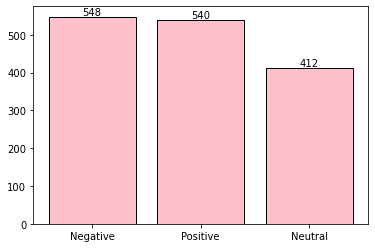

In [30]:
x=['Negative','Positive','Neutral']
y=[548,540,412]

plt.bar(x,y,fc="pink",ec="black")

for i in range (len(x)):
    plt.text(i,y[i],y[i],ha="center",va="bottom")

plt.xlabel='sentiment category'
plt.ylabel='count'
plt.show()